<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Template para o Colab do Projeto Semestral**
---

Atenção, podem ser que nem todas as tarefas sejam executadas no Colab (a aplicação por exemplo, pode estar hospedada no streamlit cloud). Mas a maior parte pode estar aqui ou ao menos indicada e comentada.


Além disso a entrega deve incluir:

1. **Um GitHub público do projeto**
2. **Código completo e executável em um notebook Python (este template)**
3. **Uma aplicação streamlit para consumo do modelo**
4. **Um texto/artigo do projeto**
5. **Um vídeo (link YouTube ou outro) de no máximo 3min de apresentação do projeto**

Um **`readme.md`** no GitHub público do projeto deve indicar (um índice) cada uma dessas entregas.








In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética (*informe \<RA\>,\<nome\>*)
Aluno1 = '10402875, Enrico Cuono' #@param {type:"string"}
Aluno2 = 'None' #@param {type:"string"}
Aluno3 = 'None' #@param {type:"string"}
Aluno4 = 'None' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}



In [ ]:
#@title Assinale aqui a sua opção de Projeto
Projeto = "IA Aplicada a Imagens: Uso de Modelos de Redes Neurais" #@param ["IA Aplicada a Imagens: Uso de Modelos de Redes Neurais", "IA Aplicada a Documentos: Uso de Grandes Modelos de Linguagem Abertos"]




# **Resumo**

Durante o uso cotidiano de veículos, é comum que ocorram arranhões e amassados, que algumas vezes, podem passar despercebidos. Pensando nisso, surge a proposta de desenvolver uma inteligência artificial capaz de identificar automaticamente danos na lataria de um carro, como riscos e amassados. Essa tecnologia pode ser amplamente aplicada por proprietários de veículos, concessionárias e seguradoras, oferecendo agilidade, praticidade e precisão na detecção de danos, além de facilitar processos de avaliação, manutenção e seguros. Podem ser encontradas maiores dificuldades na identificação de imagens com iluminações fortes e designs de carrocerias que possam parecer danos, como curvas acentuadas.

A IA será treinada utilizando PyTorch, com 70 imagens de carros danificados adquiridas no Kaggle (https://www.kaggle.com/datasets/lplenka/coco-car-damage-detection-dataset) e não danificados da cars.com. Todas as imagens foram transferidas para um drive pessoal, buscando facilidade na importação.

Foram utilizados:
- PyTorch:	Construção e treinamento de redes neurais
- Torchvision:	Modelos pré-treinados, processamento de imagem
- PIL (Pillow):	Leitura e conversão de imagens
- Scikit-learn:	Avaliação de desempenho (métricas)
- Matplotlib:	Visualização de imagens

O modelo será capaz de classificar imagens de carros em duas categorias principais:

- Carro normal (sem danos visíveis)

- Carro danificado (com amassados, arranhões ou outros tipos de danos)

Os resultados variam entre cada treinamento, entre um deles obtivemos:

|              | precision | recall | f1-score | support |
|--------------|-----------|--------|----------|---------|
| danificado   | 0.81      | 1.00   | 0.89     | 75      |
| normal       | 1.00      | 0.56   | 0.72     | 41      |
| accuracy     |           |        | 0.84     | 116     |
| macro avg    | 0.90      | 0.78   | 0.81     | 116     |
| weighted avg | 0.87      | 0.84   | 0.83     | 116     |

# **Apresentação dos dados**

https://www.kaggle.com/datasets/lplenka/coco-car-damage-detection-dataset
https://drive.google.com/file/d/1rPwGtK9sa1jKS0YQCMCpUAfRUtIgSevO/view


# **Preparação e transformação dos dados**



1. Importação das bibliotecas

In [23]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torchvision import models
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

2. Definição da classe CarClassfier

In [24]:
class CarClassifier(nn.Module):
    def __init__(self):
        super(CarClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 16, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(32 * 32 * 32, 64), nn.ReLU(),
            nn.Linear(64, 2)  # 2 classes: normal e danificado
        )

    def forward(self, x):
        return self.model(x)


3.  Preparação das imagens

In [26]:
!pip install -q gdown

!gdown --id 1rPwGtK9sa1jKS0YQCMCpUAfRUtIgSevO

!unzip projIA.zip -d ./dados

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rPwGtK9sa1jKS0YQCMCpUAfRUtIgSevO
To: /content/projIA.zip
100% 11.2M/11.2M [00:00<00:00, 36.6MB/s]
Archive:  projIA.zip
  inflating: ./dados/projIA/carros/danificado/1.jpg  
replace ./dados/projIA/carros/danificado/10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ./dados/projIA/carros/danificado/10.jpg  
  inflating: ./dados/projIA/carros/danificado/13.jpg  
  inflating: ./dados/projIA/carros/danificado/14.jpg  
  inflating: ./dados/projIA/carros/danificado/15.jpg  
  inflating: ./dados/projIA/carros/danificado/16.jpg  
  inflating: ./dados/projIA/carros/danificado/17.jpg  
  inflating: ./dados/projIA/carros/danificado/18.jpg  
  inflating: ./dados/projIA/carros/danificado/19.jpg  
  inflating: ./dados/pro

In [27]:
carrosTreino = "./dados/projIA/carros"

# Transforms
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

# Dataset
dataset = datasets.ImageFolder(carrosTreino, transform=transform)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# **Fine Tuning do modelo**


In [28]:
# Carrega modelo pré-treinado e adapta
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 2)  # Duas classes

model = model.to(device)

# Função de perda e otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Treinamento
for epoch in range(10):
    model.train()
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoca {epoch+1}, última perda: {loss.item():.4f}")

# Salvando modelo
torch.save(model.state_dict(), "modelo_carro.pth")


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1, Loss: 0.6546
Epoch 2, Loss: 0.0407
Epoch 3, Loss: 0.0468
Epoch 4, Loss: 0.0019
Epoch 5, Loss: 0.0038
Epoch 6, Loss: 0.0004
Epoch 7, Loss: 0.7007
Epoch 8, Loss: 0.3131
Epoch 9, Loss: 0.8836
Epoch 10, Loss: 0.3714


# **Avaliação do modelo**



In [29]:
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

print(classification_report(y_true, y_pred, target_names=["danificado", "normal"]))


              precision    recall  f1-score   support

  danificado       0.81      1.00      0.89        75
      normal       1.00      0.56      0.72        41

    accuracy                           0.84       116
   macro avg       0.90      0.78      0.81       116
weighted avg       0.87      0.84      0.83       116



# **Consumo do modelo**

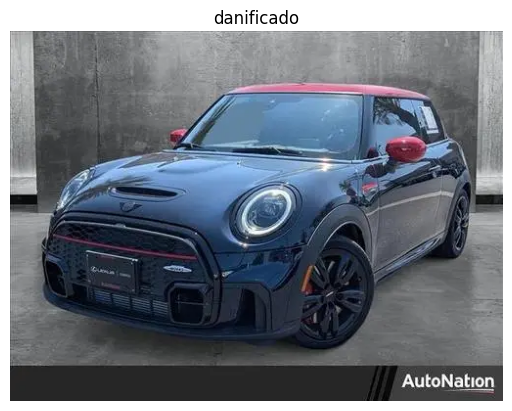

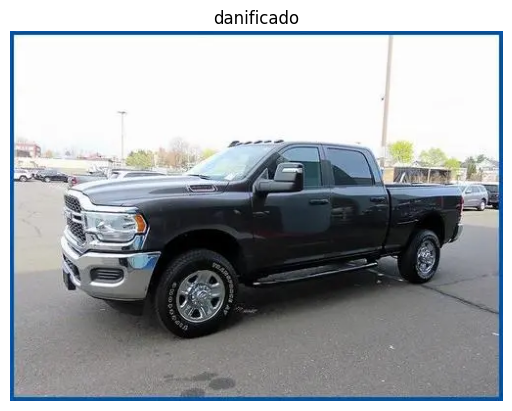

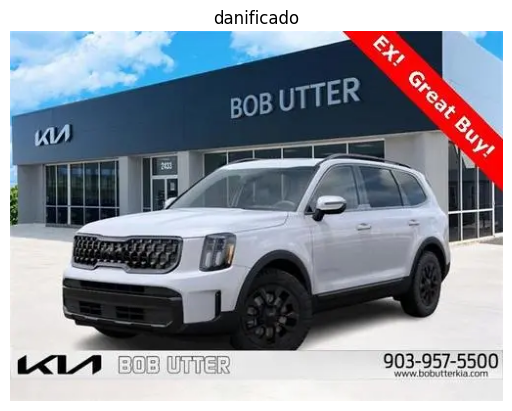

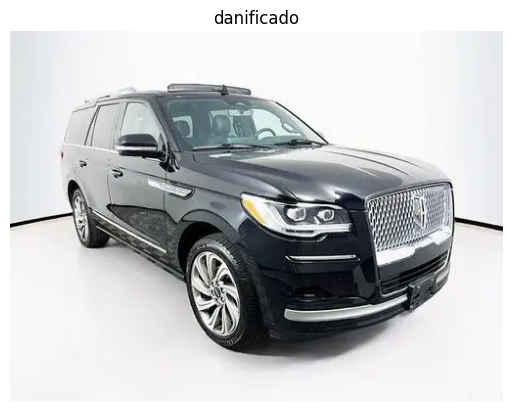

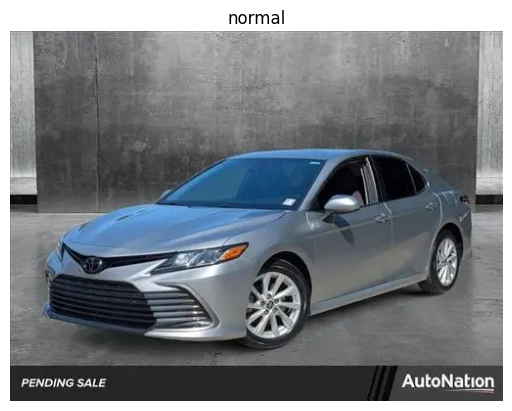

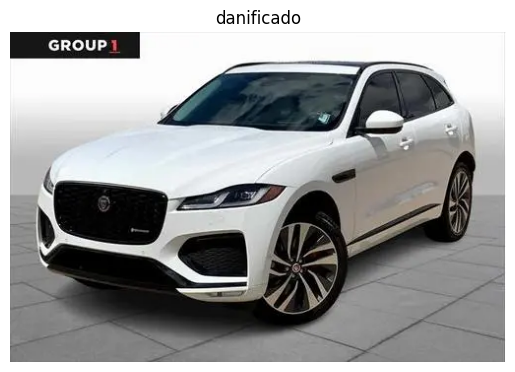

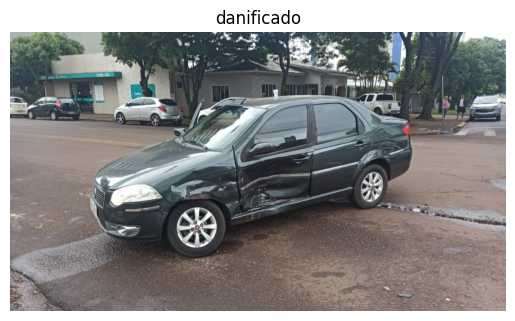

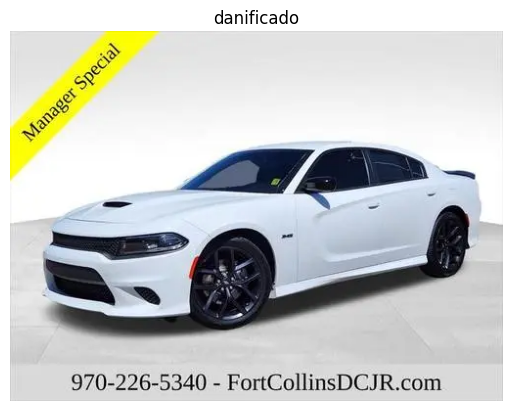

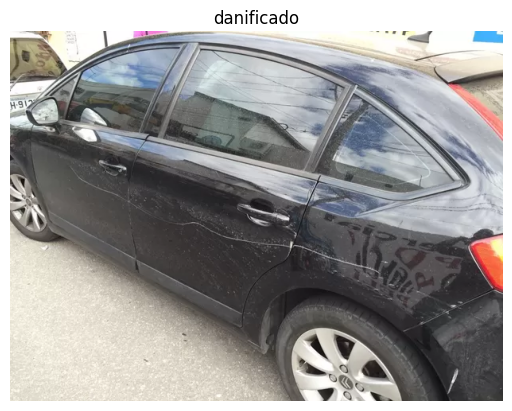

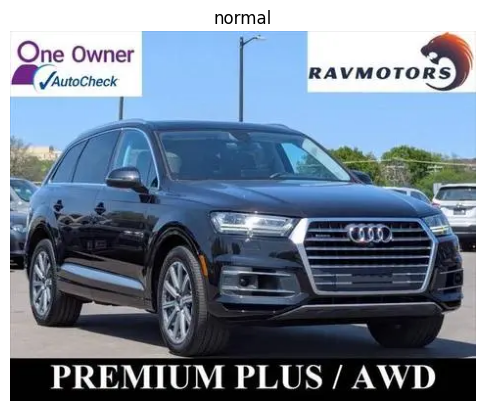

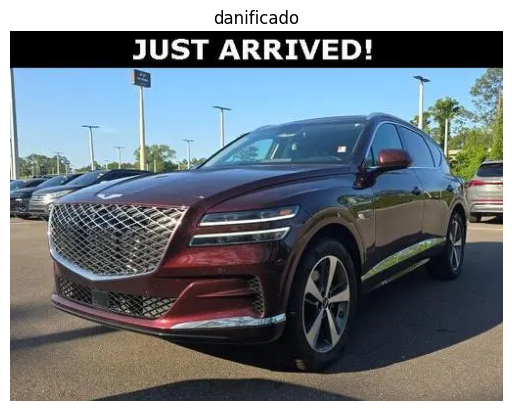

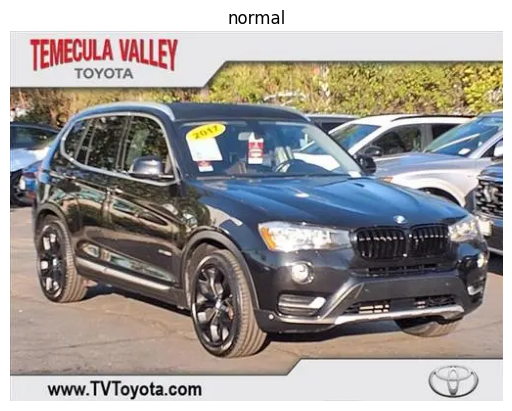

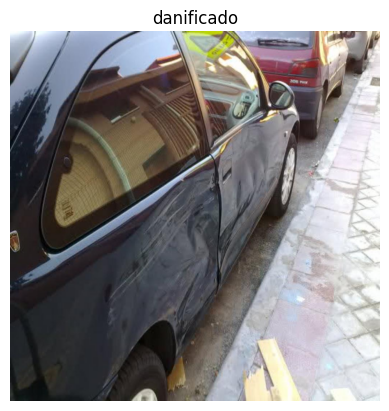

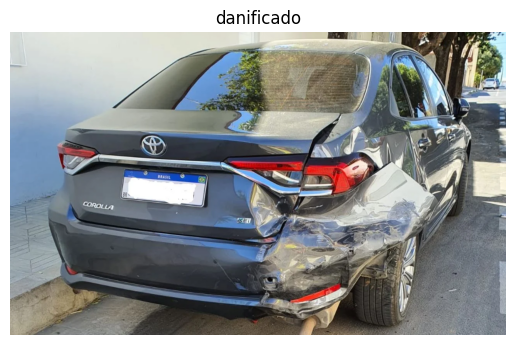

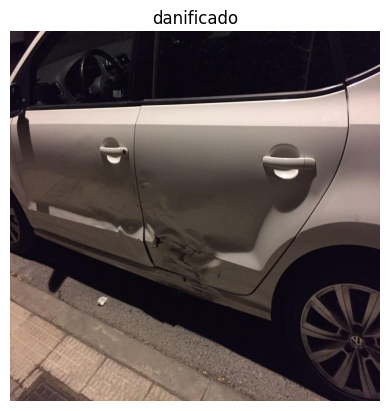

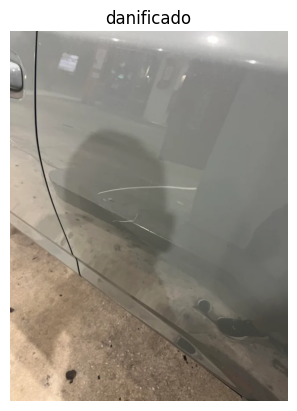

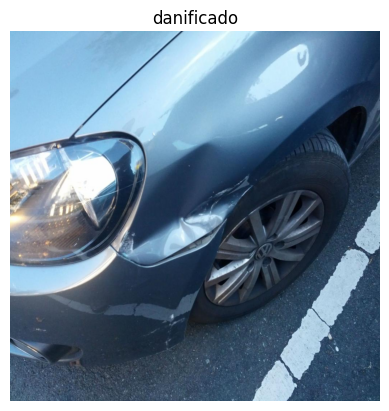

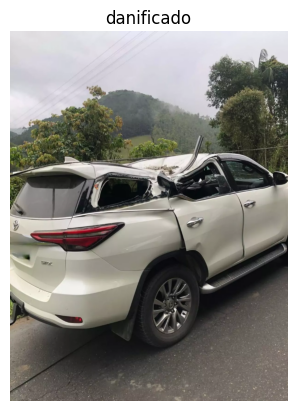

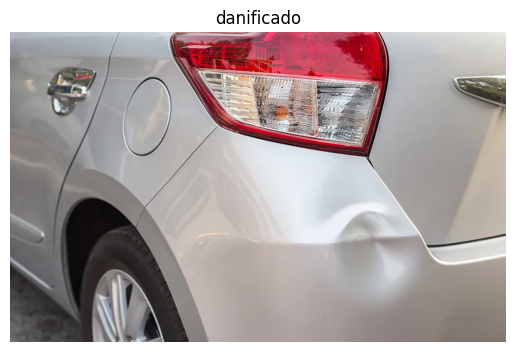

In [31]:
carrosTeste = "./dados/projIA/testes"

# Recarrega modelo treinado
model.load_state_dict(torch.load("modelo_carro.pth"))
model.eval()

for img_name in os.listdir(carrosTeste):
    img_path = os.path.join(carrosTeste, img_name)
    image = Image.open(img_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image_tensor)
        pred = torch.argmax(output, 1).item()
        label = "danificado" if pred == 0 else "normal"

    # Mostrar imagem com título
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"{label}", fontsize=12)
    plt.show()


# **Referências**

- Materiais de aula
- https://docs.pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html
- https://docs.pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
- https://docs.pytorch.org/docs/stable/generated/torch.nn.Linear.html

---

In [ ]:
#@title **Avaliação**
GitHub = 10 #@param {type:"slider", min:0, max:10, step:1}

Implementacao_Model_Code = 7 #@param {type:"slider", min:0, max:10, step:1}

Aplicacao_Streamlit = 9 #@param {type:"slider", min:0, max:10, step:1}

Texto_Artigo  = 6 #@param {type:"slider", min:0, max:10, step:1}

Video = 7 #@param {type:"slider", min:0, max:10, step:1}

Geral = 7 #@param {type:"slider", min:0, max:10, step:1}








In [ ]:
#@title **Nota Final**

nota = 2*GitHub + 4*Implementacao_Model_Code + 2*Aplicacao_Streamlit + 1*Texto_Artigo + 1*Video

nota = nota / 10

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()

lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)

Nota final do trabalho 7.9



tia              nome  nota
0  1115665    ADRIANA FUJITA   7.9
1  1115677   DANIEL HENRIQUE   7.9